
### Default of Credit Card Clients Data
#### Joe Laslie
#### Jan. 2021
---

### 4. Modeling

In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('C:\\Users\\lasli\\Documents\\Independent Work\\Credit Default')
file = 'Default of Credit Card Clients Normalized.csv'

data = pd.read_csv(file, header=0)
data

,Amt of Given Credit_scaled,Sex_scaled,Education_scaled,Marriage_scaled,Age_scaled,Payment Status (Apr)_scaled,Payment Status (May)_scaled,Payment Status (Jun)_scaled,Payment Status (Jul)_scaled,Payment Status (Aug)_scaled,...,Amt of Bill (Jun)_scaled,Amt of Bill (May)_scaled,Amt of Bill (Apr)_scaled,Amt Paid (Sep)_scaled,Amt Paid (Aug)_scaled,Amt Paid (Jul)_scaled,Amt Paid (Jun)_scaled,Amt Paid (May)_scaled,Amt Paid (Apr)_scaled,Default Payment Next Month
0,0.342466,1.0,0.000000,0.666667,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025312,0.051523,0.407316,0.116545,0.032895,0.020554,0.115125,0.000000,0.010542,0
1,0.150685,1.0,0.333333,0.333333,0.352941,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007954,0.008878,0.391921,0.001688,0.001043,0.000000,0.003263,0.001041,0.000000,1
2,0.054795,1.0,0.666667,0.333333,0.509804,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012112,0.067559,0.391853,0.018242,0.011292,0.004895,0.157089,0.000847,0.000000,0
3,0.301370,1.0,0.000000,0.666667,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.039215,0.035808,0.434129,0.092251,0.043837,0.036732,0.073857,0.122868,0.000000,0
4,0.506849,0.0,0.333333,0.666667,0.215686,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.073207,0.030968,0.405247,0.115060,0.049967,0.059094,0.061178,0.039125,0.023896,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,0.479452,0.0,0.333333,0.333333,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009658,0.009575,0.392694,0.004466,0.002759,0.002002,0.005090,0.003249,0.001770,0
4036,0.164384,0.0,0.666667,0.333333,0.470588,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013571,0.010754,0.392958,0.009754,0.009344,0.006600,0.008182,0.004003,0.006956,1
4037,0.041096,0.0,0.333333,0.666667,0.509804,0.333333,0.333333,0.444444,0.333333,0.333333,...,0.112420,0.100488,0.445671,0.021367,0.000000,0.004789,0.000000,0.011598,0.000000,1
4038,0.273973,0.0,0.333333,0.333333,0.254902,0.444444,0.333333,0.333333,0.333333,0.333333,...,0.013049,0.012556,0.394440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


> Get train-test indices. Perform stratified shuffle split so that each fold has same class proportion. Perform random oversampling to obtain X and y train sets with 50-50 split of the class.

In [2]:
features = list(data.columns[:-1])
features

['Amt of Given Credit_scaled',
 'Sex_scaled',
 'Education_scaled',
 'Marriage_scaled',
 'Age_scaled',
 'Payment Status (Apr)_scaled',
 'Payment Status (May)_scaled',
 'Payment Status (Jun)_scaled',
 'Payment Status (Jul)_scaled',
 'Payment Status (Aug)_scaled',
 'Payment Status (Sep)_scaled',
 'Amt of Bill (Sep)_scaled',
 'Amt of Bill (Aug)_scaled',
 'Amt of Bill (Jul)_scaled',
 'Amt of Bill (Jun)_scaled',
 'Amt of Bill (May)_scaled',
 'Amt of Bill (Apr)_scaled',
 'Amt Paid (Sep)_scaled',
 'Amt Paid (Aug)_scaled',
 'Amt Paid (Jul)_scaled',
 'Amt Paid (Jun)_scaled',
 'Amt Paid (May)_scaled',
 'Amt Paid (Apr)_scaled']

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler

#-----------------------------------------------------------
# Do the stratified train-test split
# Then oversample to training set (doing this 2nd ensures we don't have same values in train/test)
# Fit models on resampled training data
#-----------------------------------------------------------

# Get the split iindexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=10,
                                         test_size=0.3,
                                         random_state=15)

train_idx, test_idx = next(strat_shuf_split.split(data[features], data['Default Payment Next Month']))

# Create the dataframes
X_train = data.loc[train_idx, features]
y_train = data.loc[train_idx, 'Default Payment Next Month']

X_test = data.loc[test_idx, features]
y_test = data.loc[test_idx, 'Default Payment Next Month']

# Oversample from training set
ros = RandomOverSampler(random_state=15)
X_resampled_train, y_resampled_train = ros.fit_resample(X_train, y_train)

In [4]:
y_test.value_counts(normalize=True)

0    0.644389
1    0.355611
Name: Default Payment Next Month, dtype: float64

In [5]:
y_train.value_counts(normalize=True)

0    0.644272
1    0.355728
Name: Default Payment Next Month, dtype: float64

In [6]:
pd.Series(y_resampled_train).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

##### 4.1 Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

> Logistic regression with no regularization:

In [8]:
lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_resampled_train, y_resampled_train)

> L1 regularized logistic regression:

In [9]:
lr_l1 = LogisticRegressionCV(Cs=100, cv=5, penalty='l1', solver='liblinear', max_iter=1000)
lr_l1 = lr_l1.fit(X_resampled_train, y_resampled_train)

> L2 regularized logistic regression:

In [10]:
lr_l2 = LogisticRegressionCV(Cs=100, cv=5, penalty='l2', solver='liblinear', max_iter=1000)
lr_l2 = lr_l2.fit(X_resampled_train, y_resampled_train)

> Examine coefficients of each model

In [11]:
coeff_list = []

coeff_labels = ['lr', 'lr_l1', 'lr_l2']
coeff_models = [lr, lr_l1, lr_l2]

for label, model in zip(coeff_labels, coeff_models):
    coeffs = model.coef_
    coeff_list.append(pd.DataFrame(coeffs.T))
    
coefficients = pd.concat(coeff_list, axis=1)
coefficients.columns = coeff_labels
coefficients.set_index(data.columns[:-1], inplace=True)
coefficients

,lr,lr_l1,lr_l2
Amt of Given Credit_scaled,-0.770000,-0.540874,-0.651055
Sex_scaled,-0.013983,0.006627,-0.001857
Education_scaled,-0.483598,-0.531697,-0.524319
Marriage_scaled,0.021015,0.053880,0.062004
Age_scaled,0.862038,0.967341,0.966200
Payment Status (Apr)_scaled,2.326603,2.357461,2.473462
Payment Status (May)_scaled,1.319575,1.228364,1.266489
Payment Status (Jun)_scaled,0.593434,0.127666,0.348827
Payment Status (Jul)_scaled,0.168913,0.099825,-0.011724
Payment Status (Aug)_scaled,1.027087,1.138014,1.109516


In [12]:
sorted_coeffs = pd.DataFrame(coefficients['lr'].sort_values())
sorted_coeffs['lr_l1'] = coefficients['lr_l1'].sort_values()
sorted_coeffs['lr_l2'] = coefficients['lr_l2'].sort_values()
sorted_coeffs

,lr,lr_l1,lr_l2
Amt Paid (Aug)_scaled,-2.657063,-11.546499,-8.306310
Amt Paid (Sep)_scaled,-2.182307,-7.901459,-3.805246
Amt Paid (Jun)_scaled,-1.426011,-2.835583,-2.296520
Amt Paid (Jul)_scaled,-1.330100,-2.844716,-3.292171
Amt of Given Credit_scaled,-0.770000,-0.540874,-0.651055
Amt Paid (May)_scaled,-0.724360,-0.188468,-0.597197
Education_scaled,-0.483598,-0.531697,-0.524319
Amt of Bill (Apr)_scaled,-0.403363,-1.754144,-0.827183
Amt of Bill (Sep)_scaled,-0.399134,-16.091023,-3.358805
Amt of Bill (Jul)_scaled,-0.219586,-3.426944,-1.195350


> It appears that for each model, the payment status for August, September, May, and April increase the log odds of default the next month the most and the amount paid down for August, September, June, and July decrease the log odds of default the next month the most.

In [13]:
# Predict and store the class for each model
# Store the probabilities of the predicted class for each model

y_pred = []
y_prob = []

coeff_labels = ['lr', 'lr_l1', 'lr_l2']
coeff_models = [lr, lr_l1, lr_l2]

for label, model in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(model.predict(X_test), name=label))
    y_prob.append(pd.Series(model.predict_proba(X_test)[:,1], name=label))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

In [14]:
y_pred.head()

,lr,lr_l1,lr_l2
0,1,1,1
1,0,0,0
2,1,1,1
3,0,0,0
4,0,0,0


In [15]:
y_prob.head()

,lr,lr_l1,lr_l2
0,0.877940,0.882263,0.884492
1,0.184341,0.147535,0.162495
2,0.710228,0.768653,0.740607
3,0.209081,0.125210,0.161922
4,0.439719,0.478813,0.468964


> Look at predictions where models disagree. Most occur between the unregularized and regularized models.

In [16]:
y_pred[y_pred['lr'] != y_pred['lr_l1']]

,lr,lr_l1,lr_l2
59,0,1,1
127,1,0,0
129,1,0,1
134,0,1,1
200,0,1,1
254,0,1,0
536,0,1,1
617,0,1,1
628,0,1,0
715,0,1,1


In [17]:
y_pred[y_pred['lr'] != y_pred['lr_l2']]

,lr,lr_l1,lr_l2
59,0,1,1
127,1,0,0
134,0,1,1
200,0,1,1
536,0,1,1
617,0,1,1
715,0,1,1
732,0,1,1
746,0,1,1
1197,1,0,0


In [18]:
y_pred[y_pred['lr_l1'] != y_pred['lr_l2']]

,lr,lr_l1,lr_l2
129,1,0,1
254,0,1,0
628,0,1,0
942,0,1,0
1093,0,1,0


> For each model, calculate:
   * Accuracy
   * Precision
   * Recall
   * F-score
   * Confusion Matrix
   * ROC Curve
   * Precision-Recall Curve

> Accuracy, Precision, Recall, F-score, AUC score:

In [19]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metrics = []
cm = dict()

for label in coeff_labels:
    
    # Precision, recall, f-score
    precision, recall, fscore, _ = score(y_test, y_pred[label], average='weighted')
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred[label])
    
    # ROC-AUC 
    auc = roc_auc_score(y_test, y_prob[label], average='weighted')
    
    # Confusion matrix
    cm[label] = confusion_matrix(y_test, y_pred[label])
    
    metrics.append(pd.Series({'precision': precision,
                              'recall': recall,
                              'fscore': fscore,
                              'accuracy': accuracy,
                              'auc': auc}, name=label))
    
metrics = pd.concat(metrics, axis=1)
metrics

,lr,lr_l1,lr_l2
precision,0.783093,0.781985,0.782340
recall,0.780528,0.778053,0.778878
fscore,0.781593,0.779565,0.780244
accuracy,0.780528,0.778053,0.778878
auc,0.823929,0.829249,0.828545


> Confusion matrix:

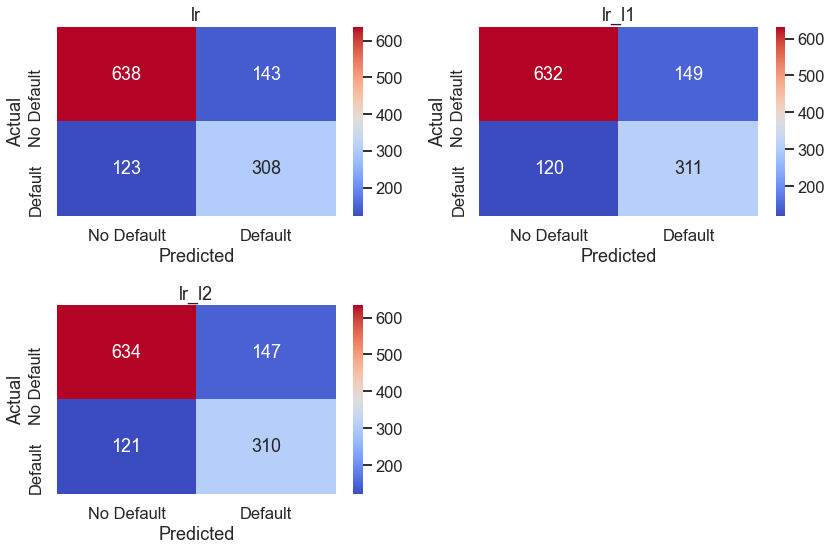

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, axList = plt.subplots(2,2)
axList = axList.flatten()
axList[-1].axis('off')
fig.set_size_inches(12,8)

for ax, label in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[label], ax=ax, annot=True, fmt='d', cmap='coolwarm');
    
    ax.set(title=label)
    ax.set_xticklabels(['No Default', 'Default'])
    ax.set_yticklabels(['No Default', 'Default'])
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    
plt.tight_layout()

> ROC and Precision-Recall curves:

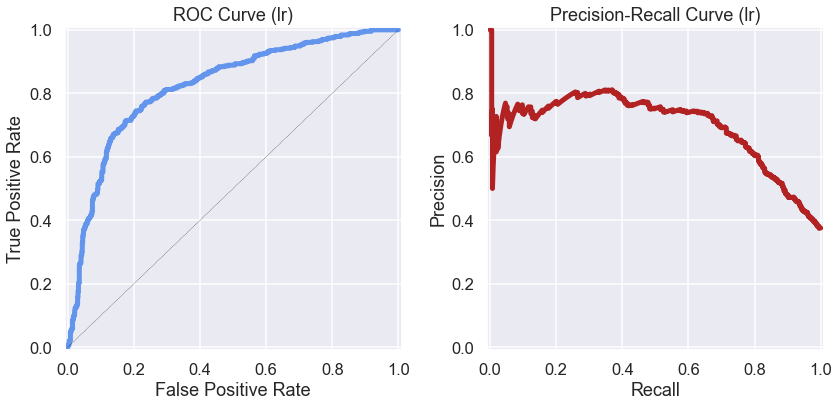

In [21]:
from sklearn.metrics import roc_curve, precision_recall_curve

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(12,6)

# Plot ROC-AUC curve for lr
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob['lr'])
ax.plot(fpr, tpr, color='cornflowerblue', linewidth=5)

# Diagonal line
ax.plot([0,1], [0,1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-0.01, 1.01], ylim=[-0.01, 1.01],
       title='ROC Curve (lr)')
ax.grid(True)

# Plot Precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob['lr'])
ax.plot(recall, precision, color='firebrick', linewidth=5)
ax.set(xlabel='Recall',
       ylabel='Precision',
       xlim=[-0.01, 1.01],
       ylim=[-0.01, 1.01],
       title='Precision-Recall Curve (lr)')
ax.grid(True)

plt.tight_layout()

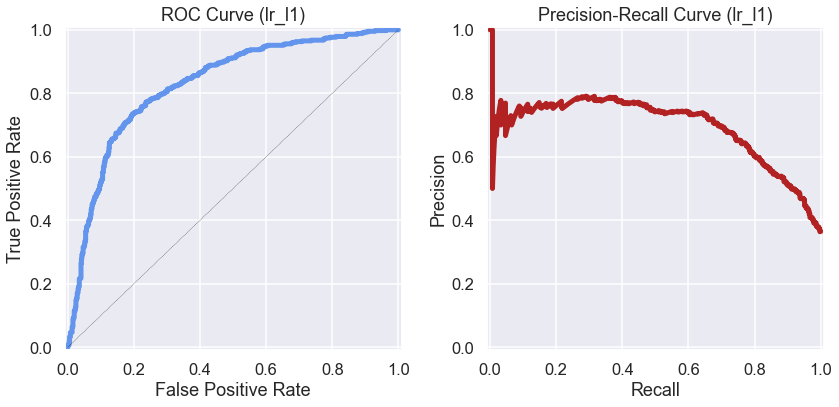

In [22]:
from sklearn.metrics import roc_curve, precision_recall_curve

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(12,6)

# Plot ROC-AUC curve for lr_l1
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob['lr_l1'])
ax.plot(fpr, tpr, color='cornflowerblue', linewidth=5)

# Diagonal line
ax.plot([0,1], [0,1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-0.01, 1.01], ylim=[-0.01, 1.01],
       title='ROC Curve (lr_l1)')
ax.grid(True)

# Plot Precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob['lr_l1'])
ax.plot(recall, precision, color='firebrick', linewidth=5)
ax.set(xlabel='Recall',
       ylabel='Precision',
       xlim=[-0.01, 1.01],
       ylim=[-0.01, 1.01],
       title='Precision-Recall Curve (lr_l1)')
ax.grid(True)

plt.tight_layout()

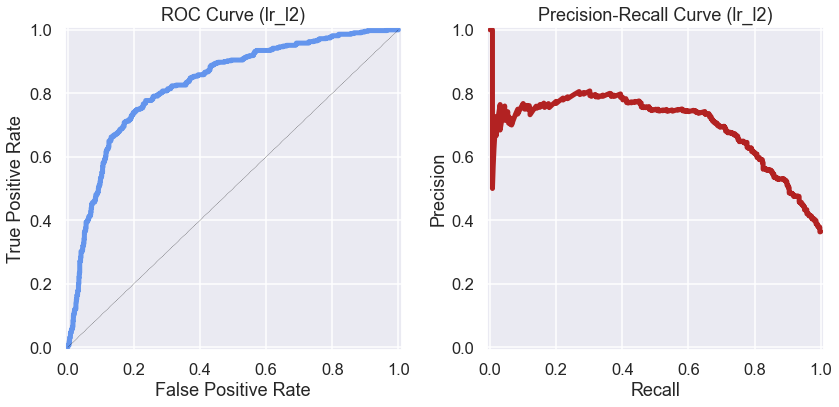

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(12,6)

# Plot ROC-AUC curve for lr_l2
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob['lr_l2'])
ax.plot(fpr, tpr, color='cornflowerblue', linewidth=5)

# Diagonal line
ax.plot([0,1], [0,1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-0.01, 1.01], ylim=[-0.01, 1.01],
       title='ROC Curve (lr_l2)')
ax.grid(True)

# Plot Precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob['lr_l2'])
ax.plot(recall, precision, color='firebrick', linewidth=5)
ax.set(xlabel='Recall',
       ylabel='Precision',
       xlim=[-0.01, 1.01],
       ylim=[-0.01, 1.01],
       title='Precision-Recall Curve (lr_l2)')
ax.grid(True)

plt.tight_layout()

##### 4.2 KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [37]:
# Find optimal k

f1_scores = []
error_rates = []

for k in range(1, 50):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_resampled_train, y_resampled_train)
    y_pred = knn.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    f1_scores.append((k, round(f1, 4)))
    
    error = 1-accuracy_score(y_test, y_pred)
    error_rates.append((k, round(error, 4)))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [38]:
f1_results

,K,F1 Score
0,1,0.5780
1,2,0.5780
2,3,0.6115
3,4,0.6118
4,5,0.6245
5,6,0.6169
6,7,0.6361
7,8,0.6427
8,9,0.6527
9,10,0.6498


In [39]:
error_results

,K,Error Rate
0,1,0.3036
1,2,0.3036
2,3,0.3061
3,4,0.2995
4,5,0.2937
5,6,0.2921
6,7,0.2814
7,8,0.2789
8,9,0.2731
9,10,0.2748


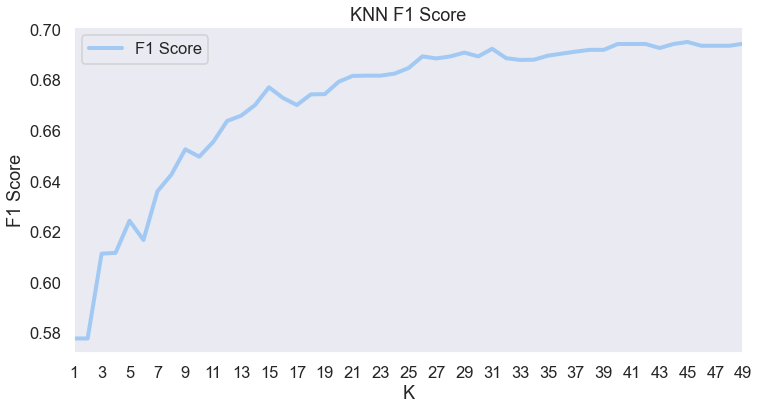

In [43]:
# F1 results
sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

ax = f1_results.set_index('K').plot(figsize=(12,6), linewidth=4)
ax.set(xlabel='K', ylabel='F1 Score', title='KNN F1 Score')
ax.set_xticks(range(1, 50, 2))

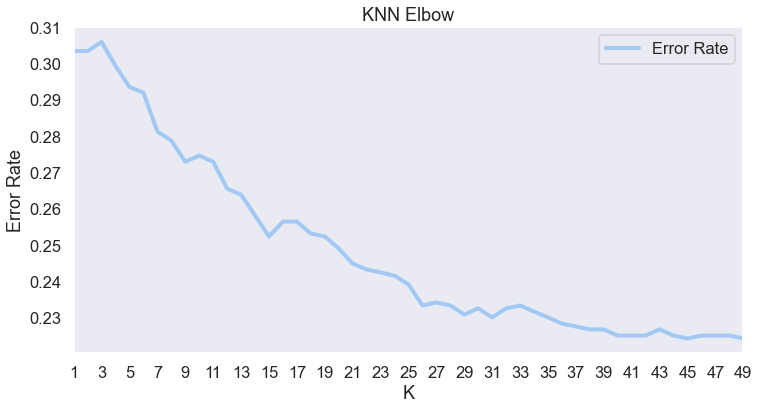

In [44]:
# Error rate results
sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

ax = error_results.set_index('K').plot(figsize=(12,6), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate', title='KNN Elbow')
ax.set_xticks(range(1, 50, 2))

> Increasing K increases F1 score and decreases error rate. Begins to plateau around K=31 or so.

> For KNN (k=31), calculate:
   * Accuracy
   * Precision
   * Recall
   * F-score
   * Confusion Matrix
   * ROC Curve
   * Precision-Recall Curve

> Accuracy, Precision, Recall, F-score, AUC score:

In [63]:
knn = KNeighborsClassifier(n_neighbors=31, weights='distance')
knn = knn.fit(X_resampled_train, y_resampled_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:,1]

In [64]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metrics = []
cm = dict()
 
# Precision, recall, f-score
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
    
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
    
# ROC-AUC 
auc = roc_auc_score(y_test, y_prob, average='weighted')
    
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
    
metrics.append(pd.Series({'precision': precision,
                              'recall': recall,
                              'fscore': fscore,
                              'accuracy': accuracy,
                              'auc': auc}, name='KNN (k=31)'))
    
metrics = pd.concat(metrics, axis=1)
metrics

,KNN (k=31)
precision,0.776536
recall,0.769802
fscore,0.772098
accuracy,0.769802
auc,0.795180


> Confusion matrix:

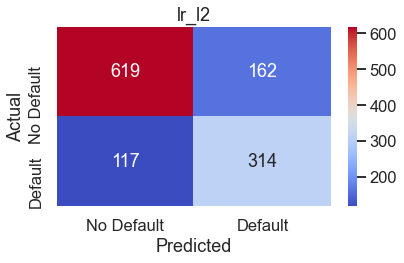

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,4)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm');
    
ax.set(title=label)
ax.set_xticklabels(['No Default', 'Default'])
ax.set_yticklabels(['No Default', 'Default'])
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
    
plt.tight_layout()

> ROC and Precision-Recall curves:

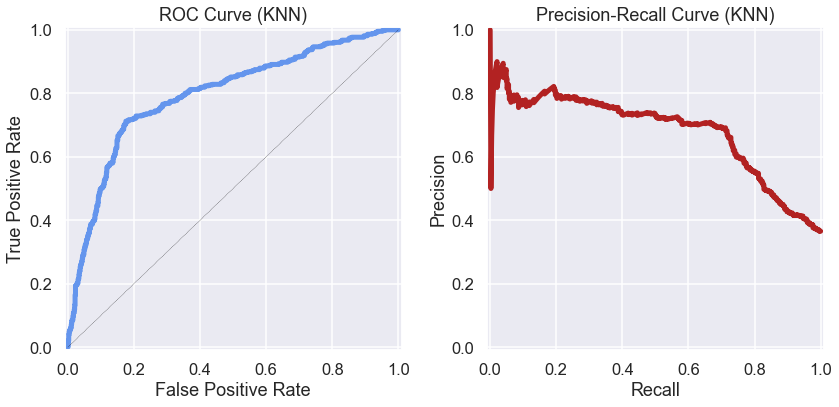

In [70]:
from sklearn.metrics import roc_curve, precision_recall_curve

sns.set_context('talk')
sns.set_palette('pastel')
sns.set_style('dark')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(12,6)

# Plot ROC-AUC curve for KNN
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ax.plot(fpr, tpr, color='cornflowerblue', linewidth=5)

# Diagonal line
ax.plot([0,1], [0,1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-0.01, 1.01], ylim=[-0.01, 1.01],
       title='ROC Curve (KNN)')
ax.grid(True)

# Plot Precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ax.plot(recall, precision, color='firebrick', linewidth=5)
ax.set(xlabel='Recall',
       ylabel='Precision',
       xlim=[-0.01, 1.01],
       ylim=[-0.01, 1.01],
       title='Precision-Recall Curve (KNN)')
ax.grid(True)

plt.tight_layout()

##### 4.3 SVM

##### 4.4 Bagging

##### 4.5 Random Forest